In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')


In [6]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


### Data Preprocess

In [7]:
data.shape

(7920, 3)

In [8]:
data.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [10]:
data.duplicated().sum()


np.int64(0)

#### Text preprocessing

In [11]:
import re
import string

#### convert uppercrease to lowercrease

In [21]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [22]:
data["tweet"] =data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [23]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

#### remove links

In [25]:

data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))


In [26]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

#### remove functuation

In [27]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [35]:
data["tweet"].tail(15)

7905    ove a fist inside my  oh god i a fist inside m...
7906    legit feels like i have a brand new phone appl...
7907    tipsy rhymes with e ye we je mi ne donts miss ...
7908    second fucking time stay on hold for  mins and...
7909    rt monteithelgort first post from my new phone...
7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

#### remove numbers

In [30]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

In [36]:
data["tweet"].tail(15)

7905    ove a fist inside my  oh god i a fist inside m...
7906    legit feels like i have a brand new phone appl...
7907    tipsy rhymes with e ye we je mi ne donts miss ...
7908    second fucking time stay on hold for  mins and...
7909    rt monteithelgort first post from my new phone...
7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

#### remove stop word


In [37]:
%pip install nltk

  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.5 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.5 kB 217.9 kB/s eta 0:00:01
     ------------------ ------------------- 20.5/41.5 kB 217.9 kB/s eta 0:00:01
     ---------------------------- --------- 30.7/41.5 kB 187.9 kB/s eta 0:00:01
     ---------------------------- --------- 30.7/41.5 kB 187.9 kB/s eta 0:00:01
     ---------------------------- --------- 30.7/41.5 kB 187.9 kB/s eta 0:00:01
     ---------------------------- --------- 30.7/41.5 kB 187.9 kB/s eta 0:00:01
     --------------------------------------  41.0/41.5 kB 93.7 kB/s eta 0:00:01
     --------------------------------------- 41.5/41.5 kB 87.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import nltk

In [61]:
nltk.download('stopwords', download_dir='../Static')

[nltk_data] Downloading package stopwords to ../Static...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [63]:
with open('../Static/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()
  
sw


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [65]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(x for x in x.split() if x not in sw))

In [66]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

#### Stemming

In [67]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [68]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

#### Get base word - 

In [69]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [70]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building vocabulary

In [72]:
from collections import Counter
vocab = Counter()

In [73]:
vocab

Counter()

In [78]:
for sentence in data['tweet']:
    vocab.update(sentence.split())
   

In [79]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [80]:
len(vocab)

15949

In [83]:
tokens = [key for key in vocab if vocab[key] > 50]

In [84]:
len(tokens)

279

In [90]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

    save_vocabulary(tokens, '../Static/vocabulaty.txt')

In [91]:
x = data['tweet']
y = data['label']

In [96]:
%pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.8 kB 187.0 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 202.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 1.4 MB/s eta 0:00:09
   ---------------------------------------- 0.1/11.1 MB 825.8 kB/s eta 0:00:14
   ---------------------------------------- 0.1/11.1 MB 751.6 kB/s eta 0:00:15
   ---------------------------------------- 0.1/11.1 MB 722.1 kB/s eta 0:00:16
    ----------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)  

In [100]:
x_train.shape

(6336,)

In [101]:
x_test.shape

(1584,)

#### Vectorization


In [134]:
import numpy as np

def vectorizer(ds, vocabulary):
    vectorized_1st = []  # Store vectorized sentences

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))  # Create a zero vector

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1  # Mark presence of the word

        vectorized_1st.append(sentence_list)  # Append sentence vector

    vectorized_1st_new = np.asarray(vectorized_1st, dtype=np.float32)  # Convert to NumPy array
    return vectorized_1st_new  # Return the correct variable


In [135]:
vectorized_x_train = vectorizer(x_train, tokens)

In [107]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 279), dtype=float32)

In [136]:
vectorized_x_train = vectorizer(x_train, tokens)

In [137]:
vectorized_x_test = vectorizer(x_test, tokens)

In [139]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 279), dtype=float32)

In [140]:
y_test

4924    1
3341    1
1915    0
804     0
5905    0
       ..
824     0
5445    1
1760    0
4607    0
2331    0
Name: label, Length: 1584, dtype: int64

In [141]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 279), dtype=float32)

In [138]:
y_train.value_counts()

label
0    4722
1    1614
Name: count, dtype: int64

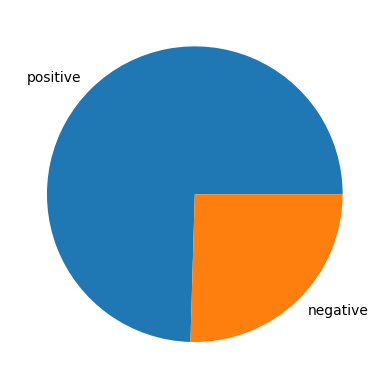

In [142]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels = ['positive', 'negative'])
plt.show()

In [144]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [157]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)

print(vectorized_x_train_smote.shape, y_train_smote.shape)



(9444, 279) (9444,)


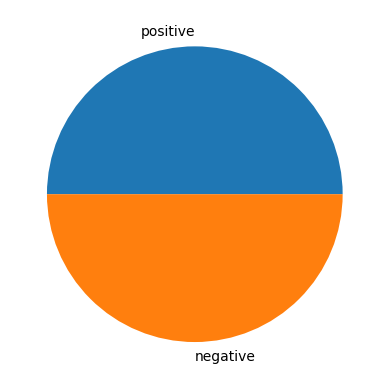

In [158]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels = ['positive', 'negative'])
plt.show()

In [162]:
vectorized_x_train_smote

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12381748, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(9444, 279), dtype=float32)

In [160]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9439    1
9440    1
9441    1
9442    1
9443    1
Name: label, Length: 9444, dtype: int64

In [152]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 279), dtype=float32)

In [153]:
y_test

4924    1
3341    1
1915    0
804     0
5905    0
       ..
824     0
5445    1
1760    0
4607    0
2331    0
Name: label, Length: 1584, dtype: int64

## model evaluation

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB  # Fixed spelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [169]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act, y_pred),3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision ={pr}\n\tRecall = {rec}\n\tF1-Score = {f1} ')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act, y_pred),3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision ={pr}\n\tRecall = {rec}\n\tF1-Score = {f1} ')

### Logistic regresssion

In [163]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote )


LogisticRegression()

In [167]:
y_train_pred = lr.predict(vectorized_x_train_smote)
y_train_pred

array([0, 0, 0, ..., 1, 1, 1], shape=(9444,))

In [170]:
training_scores(y_train_smote, y_train_pred )

Training Scores:
	Accuracy = 0.898
	Precision =0.871
	Recall = 0.934
	F1-Score = 0.901 


In [176]:
y_test_pred = lr.predict(vectorized_x_test)


In [175]:
validation_scores(y_test, y_test_pred )

Testing Scores:
	Accuracy = 0.848
	Precision =0.657
	Recall = 0.867
	F1-Score = 0.748 


### Decision Tree

In [177]:
dt = LogisticRegression()
dt.fit(vectorized_x_train_smote, y_train_smote )
y_train_pred = lr.predict(vectorized_x_train_smote)
y_test_pred = lr.predict(vectorized_x_test)
training_scores(y_train_smote, y_train_pred )
validation_scores(y_test, y_test_pred )

Training Scores:
	Accuracy = 0.898
	Precision =0.871
	Recall = 0.934
	F1-Score = 0.901 
Testing Scores:
	Accuracy = 0.848
	Precision =0.657
	Recall = 0.867
	F1-Score = 0.748 


### Random Forest

In [178]:
rf = LogisticRegression()
rf.fit(vectorized_x_train_smote, y_train_smote )
y_train_pred = lr.predict(vectorized_x_train_smote)
y_test_pred = lr.predict(vectorized_x_test)
training_scores(y_train_smote, y_train_pred )
validation_scores(y_test, y_test_pred )

Training Scores:
	Accuracy = 0.898
	Precision =0.871
	Recall = 0.934
	F1-Score = 0.901 
Testing Scores:
	Accuracy = 0.848
	Precision =0.657
	Recall = 0.867
	F1-Score = 0.748 


### RandomizedSearchCV

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap sampling
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, 
    n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42
)

# Fit on training data
random_search.fit(vectorized_x_train_smote, y_train_smote)

# Get best model from search
best_rf = random_search.best_estimator_

# Predict on training and test data
y_train_pred = best_rf.predict(vectorized_x_train_smote)
y_test_pred = best_rf.predict(vectorized_x_test)

# Evaluate model
train_acc = accuracy_score(y_train_smote, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Training Accuracy: 0.99
Test Accuracy: 0.85


In [192]:
import pickle

data_to_save = {"key1": "value1", "key2": "value2"}

with open('../Static/model.pkl', 'wb') as file:
    pickle.dump(lr, file)